# Sim Fin Daily Stock Prices Dataset 

1. Connnection to the API 

2. Data Cleaning + Selection of Target Variable for Machine Learning

3. Data Visualization 

In [ ]:
import pandas as pd
import simfin as sf
from simfin.names import CLOSE, OPEN, HIGH, LOW, VOLUME, TICKER

# Set your API key (REPLACE with your actual key)
sf.set_api_key("f3c02cd3-7e23-4d50-97b6-6393f3546006")  

# Set data directory (ensure it exists)
sf.set_data_dir("simfin_data/")

# Load daily stock prices for the US market
df_prices = sf.load_shareprices(market="us", variant="daily")

# Reset index to make 'Date' a normal column
df_prices = df_prices.reset_index()

# Select at least 5 companies (adjust as needed)
selected_tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
df_prices = df_prices[df_prices[TICKER].isin(selected_tickers)]

# Handle missing values
df_prices.fillna(method="ffill", inplace=True)  # Forward-fill missing prices
df_prices.fillna(method="bfill", inplace=True)  # Backfill any remaining gaps

# Display summary
df_prices.info()  # Check data types and missing values

Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... 

/opt/anaconda3/lib/python3.12/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
<class 'pandas.core.frame.DataFrame'>
Index: 4960 entries, 14275 to 5236318
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ticker              4960 non-null   object        
 1   Date                4960 non-null   datetime64[ns]
 2   SimFinId            4960 non-null   int64         
 3   Open                4960 non-null   float64       
 4   High                4960 non-null   float64       
 5   Low                 4960 non-null   float64       
 6   Close               4960 non-null   float64       
 7   Adj. Close          4960 non-null   float64       
 8   Volume              4960 non-null   int64         
 9   Dividend            4960 non-null   float64       
 10  Shares Outstanding  4960 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 465.0+ KB


/var/folders/59/8bbcmw0s2vlgn_2mn51xcwwc0000gn/T/ipykernel_26320/1150909930.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_prices.fillna(method="ffill", inplace=True)  # Forward-fill missing prices
/var/folders/59/8bbcmw0s2vlgn_2mn51xcwwc0000gn/T/ipykernel_26320/1150909930.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_prices.fillna(method="bfill", inplace=True)  # Backfill any remaining gaps


In [2]:
df_prices.head()  # Show first few rows

,Ticker,Date,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
14275,AAPL,2019-04-12,111052,49.80,50.03,49.05,49.72,47.64,111042672,0.19,1.842914e+10
14276,AAPL,2019-04-15,111052,49.65,49.96,49.50,49.81,47.72,70146584,0.19,1.842914e+10
14277,AAPL,2019-04-16,111052,49.87,50.34,49.64,49.81,47.73,102785540,0.19,1.842914e+10
14278,AAPL,2019-04-17,111052,49.88,50.84,49.65,50.78,48.66,115627120,0.19,1.842914e+10
14279,AAPL,2019-04-18,111052,50.78,51.04,50.63,50.97,48.83,96783064,0.19,1.842914e+10


In [3]:
df_prices.describe()

,Date,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
count,4960,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4.960000e+03,4960.000000,4.960000e+03
mean,2021-09-27 07:05:01.935483648,72345.250000,173.122776,175.542530,170.606423,173.153038,170.976331,8.358223e+07,0.446877,9.317440e+09
min,2019-04-12 00:00:00,56317.000000,12.070000,12.450000,11.800000,11.930000,11.930000,8.989150e+06,0.190000,2.605230e+09
25%,2020-07-06 18:00:00,58528.000000,120.045000,121.727500,118.150000,120.300000,118.322500,4.210676e+07,0.240000,6.369025e+09
50%,2021-09-27 12:00:00,61006.000000,160.650000,162.840000,158.750000,160.930000,159.510000,6.861960e+07,0.240000,8.753000e+09
75%,2022-12-19 06:00:00,74823.250000,230.055000,234.562500,225.870000,230.117500,226.815000,1.043214e+08,0.750000,1.165101e+10
max,2024-03-15 00:00:00,111052.000000,420.560000,427.820000,417.990000,425.220000,422.020000,9.140814e+08,0.750000,1.842914e+10
std,NaN,22465.215565,84.288690,85.427541,83.027367,84.249672,83.229267,6.501099e+07,0.232502,4.991959e+09


# Data Cleaning #

✅ Converted 'Date' into a Datetime Object

✅ Remove duplicate rows if needed

✅ Added daily price change % calculation

✅ Created Target column for market movement prediction

✅ Handled missing values


In [4]:
df_prices['Date'] = pd.to_datetime(df_prices['Date']) # converting the "Date" column to a Datetime Object 

In [5]:
df_prices.duplicated().sum()  # Count duplicates


0

Step 2: Compute Daily Price Change (%)
Once you've confirmed the correct column name (likely 'Adj. Close')

How Does This Formula Work?

![alt text](image.png)


In [6]:
df_prices["Price Change %"] = df_prices["Adj. Close"].pct_change() * 100  # Use correct column name

In [7]:
df_prices.head()

,Ticker,Date,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding,Price Change %
14275,AAPL,2019-04-12,111052,49.80,50.03,49.05,49.72,47.64,111042672,0.19,1.842914e+10,NaN
14276,AAPL,2019-04-15,111052,49.65,49.96,49.50,49.81,47.72,70146584,0.19,1.842914e+10,0.167926
14277,AAPL,2019-04-16,111052,49.87,50.34,49.64,49.81,47.73,102785540,0.19,1.842914e+10,0.020956
14278,AAPL,2019-04-17,111052,49.88,50.84,49.65,50.78,48.66,115627120,0.19,1.842914e+10,1.948460
14279,AAPL,2019-04-18,111052,50.78,51.04,50.63,50.97,48.83,96783064,0.19,1.842914e+10,0.349363


Create the Target Variable for ML
To predict whether the price will go up or down, shift the adjusted close price:

In [8]:
df_prices["Target"] = (df_prices["Adj. Close"].shift(-1) > df_prices["Adj. Close"]).astype(int)  # 1 if price rises, 0 if falls
df_prices.head()

,Ticker,Date,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding,Price Change %,Target
14275,AAPL,2019-04-12,111052,49.80,50.03,49.05,49.72,47.64,111042672,0.19,1.842914e+10,NaN,1
14276,AAPL,2019-04-15,111052,49.65,49.96,49.50,49.81,47.72,70146584,0.19,1.842914e+10,0.167926,1
14277,AAPL,2019-04-16,111052,49.87,50.34,49.64,49.81,47.73,102785540,0.19,1.842914e+10,0.020956,1
14278,AAPL,2019-04-17,111052,49.88,50.84,49.65,50.78,48.66,115627120,0.19,1.842914e+10,1.948460,1
14279,AAPL,2019-04-18,111052,50.78,51.04,50.63,50.97,48.83,96783064,0.19,1.842914e+10,0.349363,1


Handling Null Values: Since .pct_change() creates NaN values for the first row, fill them:

In [9]:
df_prices["Price Change %"].fillna(0, inplace=True)
df_prices["Target"].fillna(0, inplace=True)
df_prices.head()

/var/folders/59/8bbcmw0s2vlgn_2mn51xcwwc0000gn/T/ipykernel_26320/1265657336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prices["Price Change %"].fillna(0, inplace=True)
/var/folders/59/8bbcmw0s2vlgn_2mn51xcwwc0000gn/T/ipykernel_26320/1265657336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,Ticker,Date,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding,Price Change %,Target
14275,AAPL,2019-04-12,111052,49.80,50.03,49.05,49.72,47.64,111042672,0.19,1.842914e+10,0.000000,1
14276,AAPL,2019-04-15,111052,49.65,49.96,49.50,49.81,47.72,70146584,0.19,1.842914e+10,0.167926,1
14277,AAPL,2019-04-16,111052,49.87,50.34,49.64,49.81,47.73,102785540,0.19,1.842914e+10,0.020956,1
14278,AAPL,2019-04-17,111052,49.88,50.84,49.65,50.78,48.66,115627120,0.19,1.842914e+10,1.948460,1
14279,AAPL,2019-04-18,111052,50.78,51.04,50.63,50.97,48.83,96783064,0.19,1.842914e+10,0.349363,1


# Plot Stock Price Trends Over Time
Visualizing stock prices will help detect trends and potential seasonality in your data.

✅ Review summary statistics for outliers

✅ Visualize stock price trends over time

✅ Analyze the distribution of Price Change %

✅ Check class balance of Target

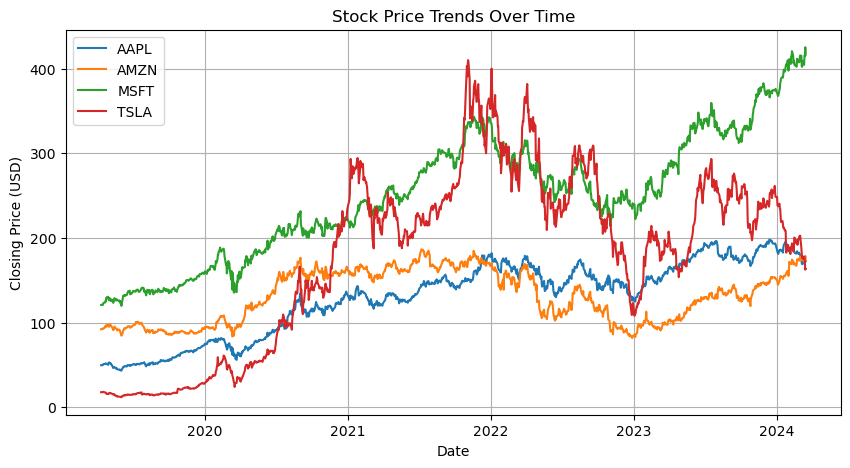

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for ticker in df_prices["Ticker"].unique():
    subset = df_prices[df_prices["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Stock Price Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()


Distribution of Price Change %
If the distribution is highly skewed, consider log transformation for ML.

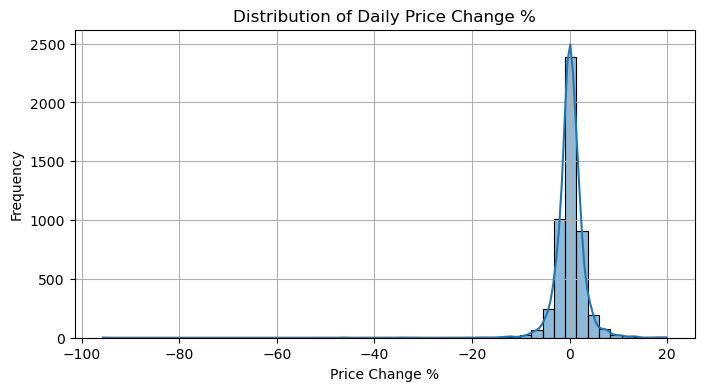

In [11]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df_prices["Price Change %"], bins=50, kde=True)
plt.title("Distribution of Daily Price Change %")
plt.xlabel("Price Change %")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Class Imbalance in Target (if used for ML)

In [12]:
df_prices["Target"].value_counts(normalize=True)  # Check balance of 1s & 0s


Target
1    0.525202
0    0.474798
Name: proportion, dtype: float64

Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... 

/opt/anaconda3/lib/python3.12/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!


<Axes: title={'center': 'MSFT Close'}, xlabel='Date'>

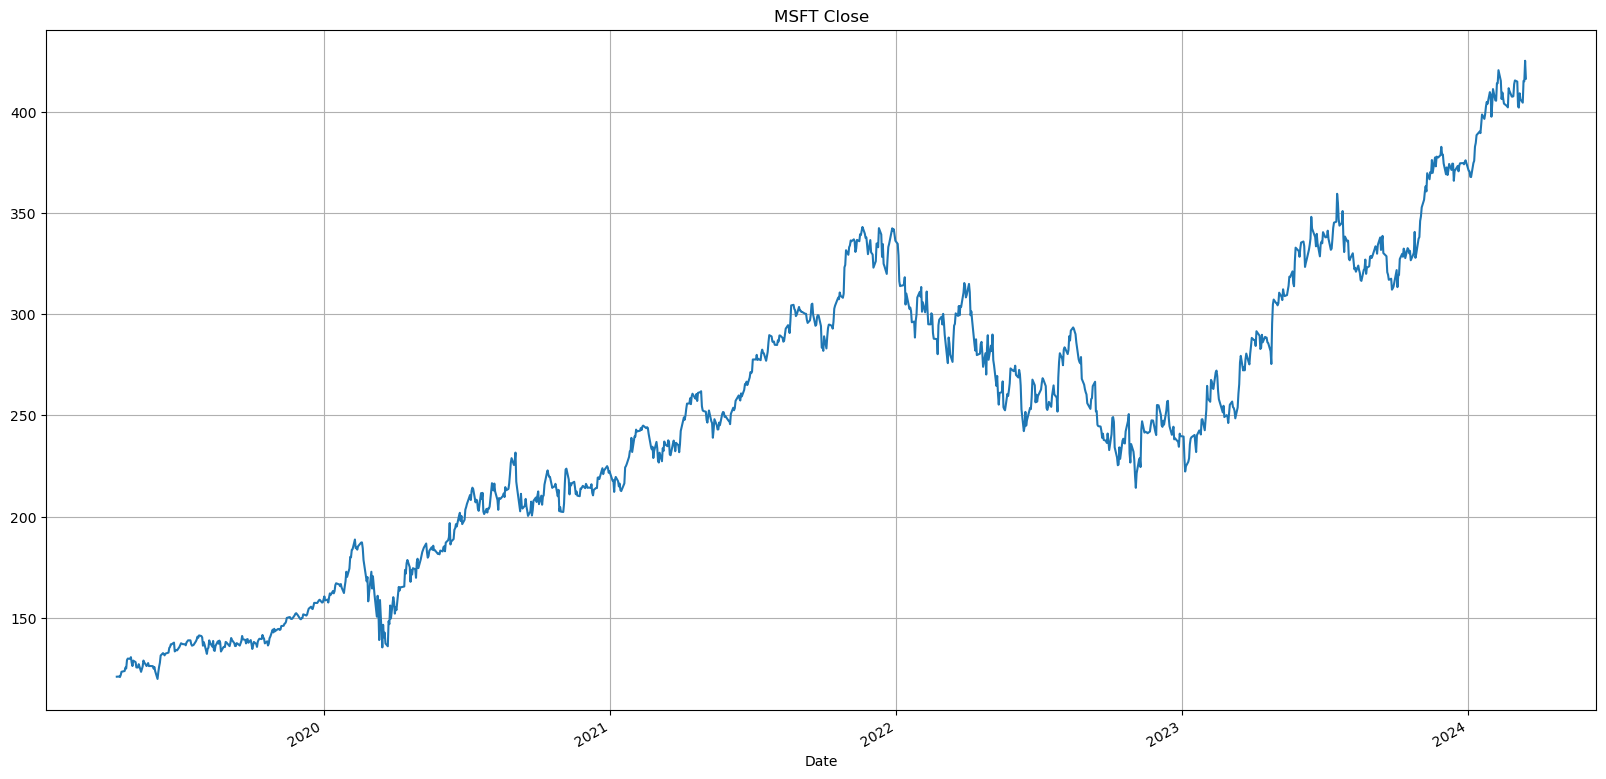

In [13]:
# Load daily share-prices for all companies in USA.
df_prices = sf.load_shareprices(market='us', variant='daily')

df_prices.to_csv("us_share_prices.csv", index=False)

# Plot the closing share-prices for ticker MSFT.
df_prices.loc['MSFT', CLOSE].plot(grid=True, figsize=(20,10), title='MSFT Close')